In [1]:
%load_ext autoreload
%autoreload 2

# Web Scraping of Beiersdorf Blogs

Der Begriff __Web Scraping__ umfasst Verfahren zur Gewinnung von Informationen durch gezieltes Extrahieren der benötigten Daten von Internetquellen ([Wikipedia](https://de.wikipedia.org/wiki/Screen_Scraping)).

> ## Ziel: Das Extrahieren von Textdaten vom [_Beiersdorf Blog_](https://www.beiersdorf.de/beiersdorf-live/karriere-blog/blog-uebersicht) und deren Visualisierung in Form einer [Schlagwortwolke](https://de.wikipedia.org/wiki/Schlagwortwolke)

## Web Scraping mit [Python](https://www.python.org/) mit [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) und [`requests`](https://2.python-requests.org/en/master/)

### Festlegen der URL

In [2]:
base_url = "https://www.beiersdorf.de/"
blog_url = "beiersdorf-live/karriere-blog/blog-uebersicht"

In [3]:
import numpy as np 
loadCounts = np.arange(0, 76, 12)
loadCounts

array([ 0, 12, 24, 36, 48, 60, 72])

In [4]:
blog_urls = [blog_url+f'?loadCount={i}' for i in loadCounts]
blog_urls

['beiersdorf-live/karriere-blog/blog-uebersicht?loadCount=0',
 'beiersdorf-live/karriere-blog/blog-uebersicht?loadCount=12',
 'beiersdorf-live/karriere-blog/blog-uebersicht?loadCount=24',
 'beiersdorf-live/karriere-blog/blog-uebersicht?loadCount=36',
 'beiersdorf-live/karriere-blog/blog-uebersicht?loadCount=48',
 'beiersdorf-live/karriere-blog/blog-uebersicht?loadCount=60',
 'beiersdorf-live/karriere-blog/blog-uebersicht?loadCount=72']

### Finden aller relevanten Links

In [5]:
import scraper

In [6]:
base_url = "https://www.beiersdorf.de/"
hyper_links = scraper.get_blog_urls(base_url, blog_urls)
hyper_links

71 links to articles were found!



['https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2016/03/2016-03-10-beiersdorf-blueplanet',
 'https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2017/04/06-die-menschen-hinter-unseren-produkten-anil-yumut',
 'https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2016/05/2016-05-06-die-menschen-hinter-unseren-produkten-zhong-xiao',
 'https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2016/07/20-die-menschen-hinter-unseren-produkten-nele-marie-bock',
 'https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2017/09/01-von-praktikanten-fuer-praktikanten',
 'https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2017/05/31-kuenstliche-intelligenz-in-der-hautpflege',
 'https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2019/05/17-eine-aktive-rolle-im-recruiting-einnehmen',
 'https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/

In [7]:
print(len(set(hyper_links)))

71


### Extrahieren aller Textelemente aller Blog Artikel

In [8]:
blog_texts = scraper.get_text(urls=hyper_links)

Exracting https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2016/03/2016-03-10-beiersdorf-blueplanet
Exracting https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2017/04/06-die-menschen-hinter-unseren-produkten-anil-yumut
Exracting https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2016/05/2016-05-06-die-menschen-hinter-unseren-produkten-zhong-xiao
Exracting https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2016/07/20-die-menschen-hinter-unseren-produkten-nele-marie-bock
Exracting https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2017/09/01-von-praktikanten-fuer-praktikanten
Exracting https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2017/05/31-kuenstliche-intelligenz-in-der-hautpflege
Exracting https://www.beiersdorf.de//beiersdorf-live/karriere-blog/blog-uebersicht/2019/05/17-eine-aktive-rolle-im-recruiting-einnehmen
Exracting https://www.beiersdorf.

### Zusammenführen aller Texte in einen Text

In [18]:
full_blog_texts = ''.join(blog_texts)
len(full_blog_texts)

210799

In [19]:
#full_blog_texts

In [20]:
len(full_blog_texts.split(' '))

29761

In [21]:
from IPython.display import IFrame    
url = 'https://i2.wp.com/electricliterature.com/wp-content/uploads/2014/07/0*HIkNNJkRFzb9CoPG.jpg?zoom=2&w=640&ssl=1'
IFrame(url, width='100%', height=400)

## Visualisierung

In [13]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
stopwords=["a","ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","ander","andere","anderem","anderen","anderer","anderes","anderm","andern","anderr","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deinen","deiner","deines","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derer","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einig","einige","einigem","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","eurem","euren","eurer","eures","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","hab","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","keines","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so",'sogar',"solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","und?","uns","unse","unsem","unsen","unser","unsere","unserer","unses","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","wann","war","waren","warst","wart","warum","was","weg","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","woher","wohin","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf",'unseren',"über","überhaupt","übrigens"]

### Schlagwortwolke 1

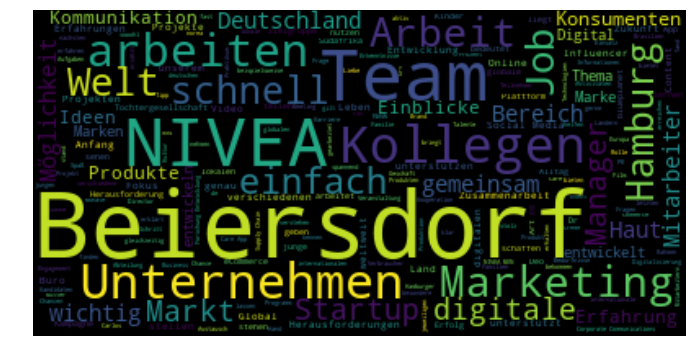

In [15]:
# Create and generate a word cloud image:
#stopwords.append('Unternehmen')
wordcloud = WordCloud(stopwords=stopwords).generate(full_blog_texts)


# Display the generated image:
fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off");

### Schlagwortwolke 2

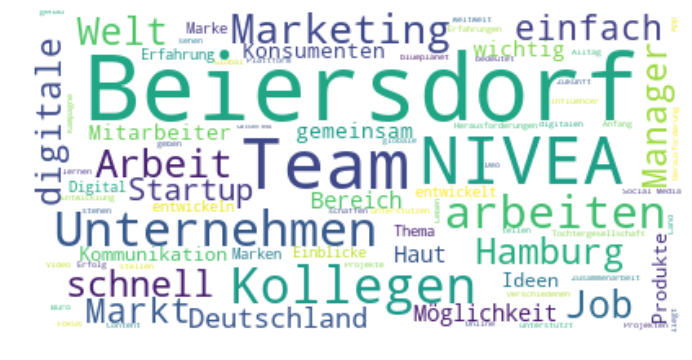

In [16]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",
                      max_words=80,
                      stopwords=stopwords,
                      mode="RGB",
                      relative_scaling=0.5,
                      random_state=42
                    ).generate(full_blog_texts)


# Display the generated image:
fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off");

### Schlagwortwolke 3

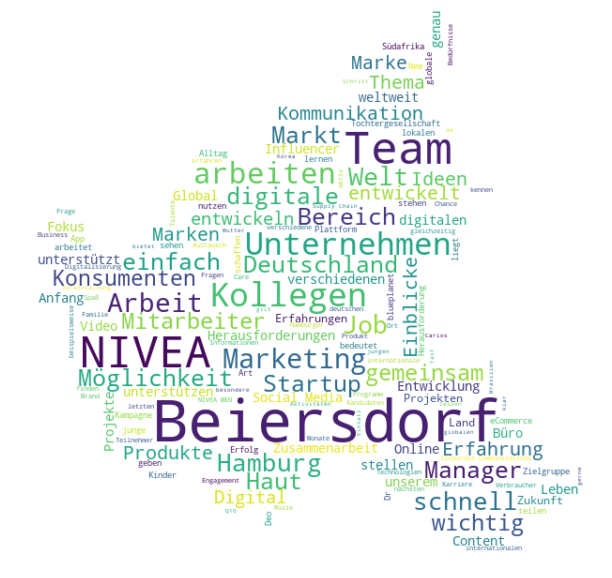

In [17]:
from PIL import Image
mask = np.array(Image.open("../data/images/Hamburg_Umriss.png"))   #choose mask

# Create and generate a word cloud image:
wordcloud = WordCloud(
    background_color="white",
                    mask=mask,
                    max_words=150,
                    stopwords=stopwords,
                    width=800,
                    height=400,
                    mode="RGB",
                      random_state=42
                    ).generate(full_blog_texts)


# Display the generated image:
fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off");

***